In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
file_path="/home/udit/Documents/Github/ISSA/rainfall_data_analysis/1901_1999_csv/1901uk.csv"
data =  pd.read_csv(file_path)

In [ ]:
print("Column Names:")
print(data.columns)
# print(data.isnull().count())


In [ ]:
any(data.isnull())

In [ ]:
# Shape of data
print(f"Shape of data: {data.shape}")

# Data types
print(data.dtypes)

In [ ]:
# Missing values check
missing_values = data.isnull().sum()
print(f"Missing values:\n{missing_values}")

In [ ]:
# Columns with all zeroes
zero_columns = (data.iloc[:, 1:] == 0).all(axis=0)
print(f"Columns with all zeroes:\n{zero_columns}")

In [ ]:
# Statistical summary for all days
print(data.describe())

In [ ]:
print(f"{data.head}")

In [ ]:
# Total activity per row (across all days)
data['Total_Activity'] = data.iloc[:, 1:].sum(axis=1)

# Total activity per day (across all FIDs)
daily_activity = data.iloc[:, 1:].sum(axis=0)
print(f"Daily activity:\n{daily_activity}")

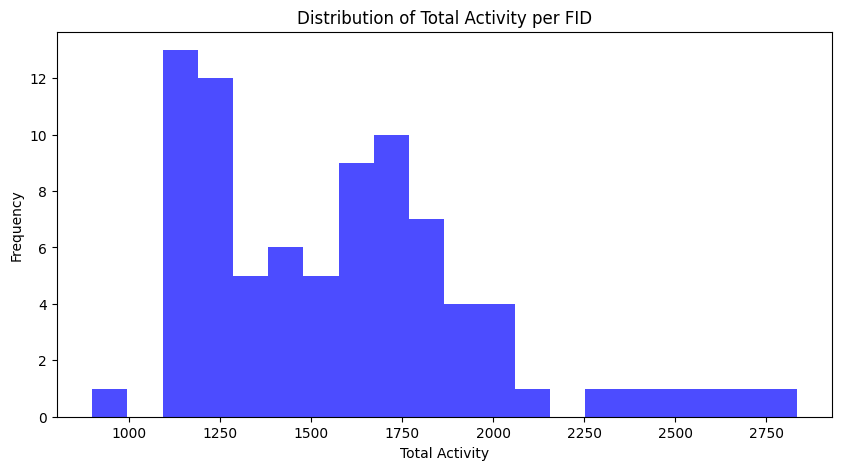

In [33]:

# Histogram of Total Activity per FID
plt.figure(figsize=(10, 5))
plt.hist(data['Total_Activity'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Total Activity per FID')
plt.xlabel('Total Activity')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Boxplot for daily values
plt.figure(figsize=(15, 5))
sns.boxplot(data=data.iloc[:, 1:])
plt.xticks(rotation=90)
plt.title('Boxplot of Daily Values (Day_1 to Day_365)')
plt.show()

In [ ]:
# Correlation matrix
corr_matrix = data.iloc[:, 1:].corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap (Day Columns)')
plt.show()


In [ ]:
# Line plot of daily activity
plt.figure(figsize=(15, 5))
plt.plot(daily_activity.index, daily_activity.values, marker='o', color='green')
plt.title('Daily Activity Trends')
plt.xlabel('Day')
plt.ylabel('Total Activity')
plt.grid()
plt.show()


In [ ]:
# Z-score for outlier detection
from scipy.stats import zscore

z_scores = zscore(data.iloc[:, 1:], axis=1)
outliers = (z_scores > 3).any(axis=1)  # Rows with Z-score > 3
print(f"Number of outliers: {outliers.sum()}")


In [ ]:
# Weekly Aggregation
weekly_data = data.iloc[:, 1:].groupby(lambda x: (int(x[4:]) - 1) // 7, axis=1).sum()
weekly_data.columns = [f'Week_{i+1}' for i in range(weekly_data.shape[1])]

# Total Zero Activity FIDs
zero_activity_fids = data[data['Total_Activity'] == 0]['FID']
print(f"FIDs with zero activity: {zero_activity_fids.tolist()}")


In [ ]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=5)
pca_result = pca.fit_transform(data.iloc[:, 1:])
print(f'Explained variance by components: {pca.explained_variance_ratio_}')

# Plot PCA Results
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
plt.title('PCA: First Two Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [22]:
# Ensure columns are properly formatted
rainfall_cols = [col for col in data.columns if col.startswith("Day_")]
data[rainfall_cols] = data[rainfall_cols].fillna(0)

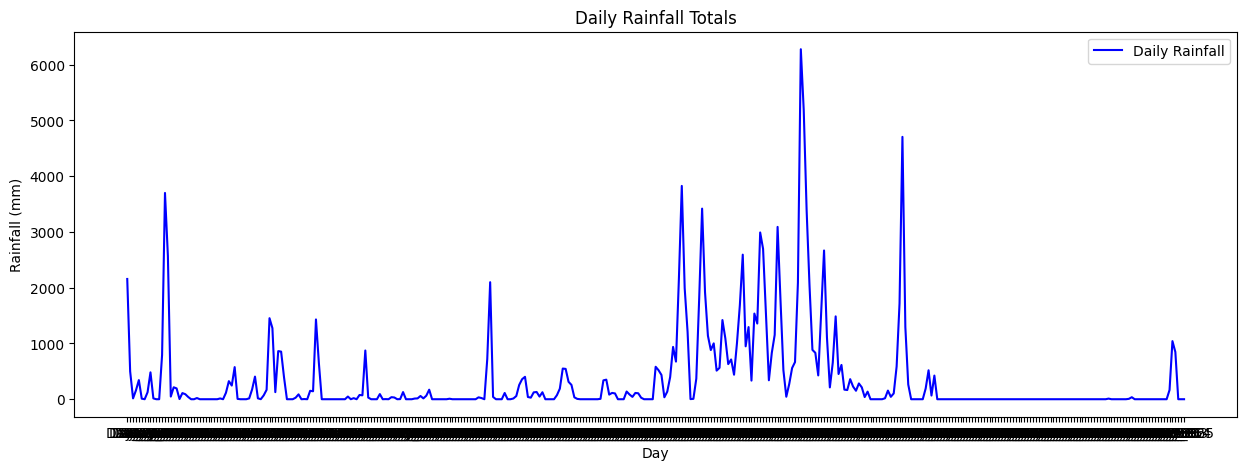

In [23]:
# Daily Analysis
daily_totals = data[rainfall_cols].sum()
plt.figure(figsize=(15, 5))
plt.plot(daily_totals, label="Daily Rainfall", color="blue")
plt.title("Daily Rainfall Totals")
plt.xlabel("Day")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.show()

/tmp/ipykernel_5872/1831600965.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekly_totals.index, y=weekly_totals.values, palette="viridis")


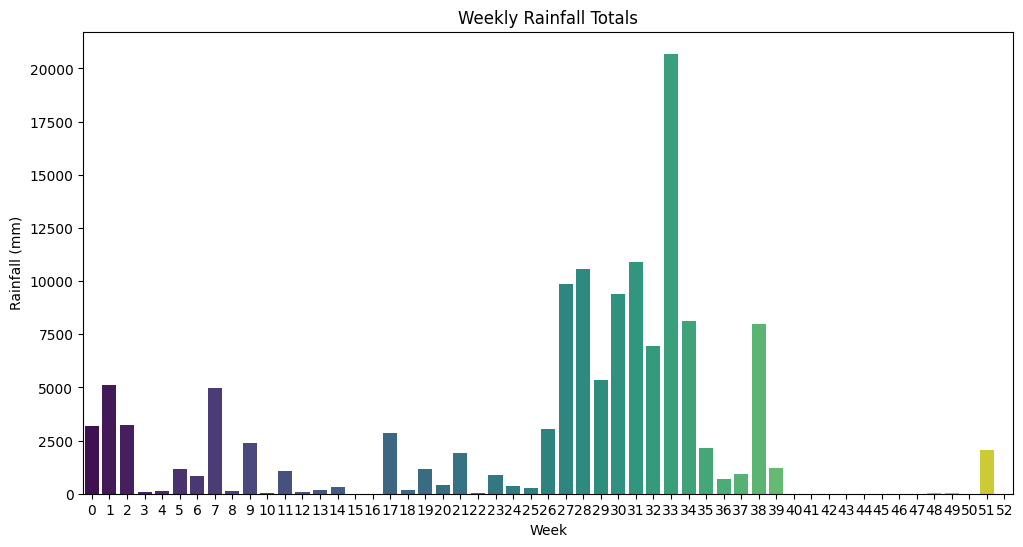

In [24]:
# Weekly Analysis
weekly_totals = daily_totals.groupby((np.arange(len(daily_totals)) // 7)).sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=weekly_totals.index, y=weekly_totals.values, palette="viridis")
plt.title("Weekly Rainfall Totals")
plt.xlabel("Week")
plt.ylabel("Rainfall (mm)")
plt.show()

/tmp/ipykernel_5872/809272168.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_totals.index + 1, y=monthly_totals.values, palette="coolwarm")


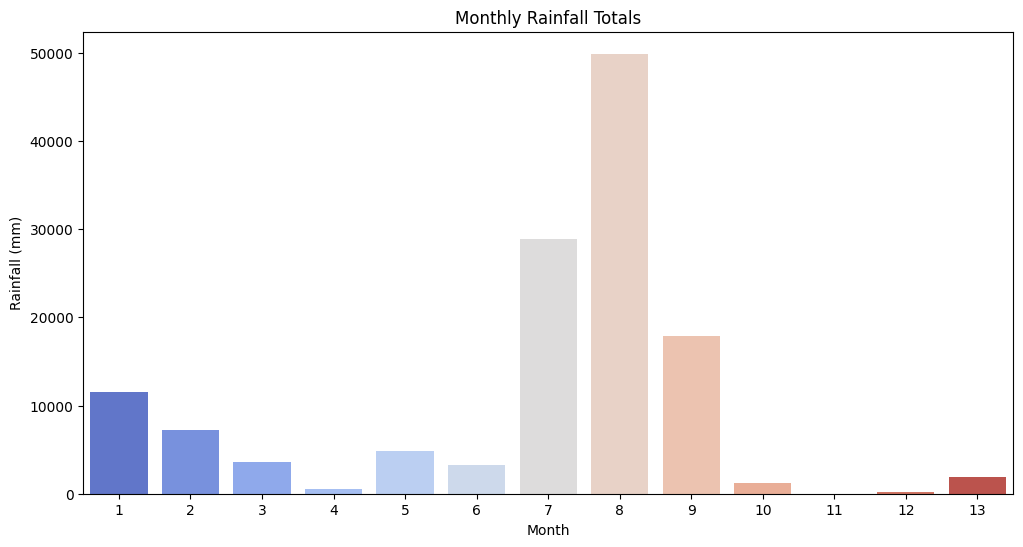

In [25]:
# Monthly Analysis
monthly_totals = daily_totals.groupby((np.arange(len(daily_totals)) // 30)).sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_totals.index + 1, y=monthly_totals.values, palette="coolwarm")
plt.title("Monthly Rainfall Totals")
plt.xlabel("Month")
plt.ylabel("Rainfall (mm)")
plt.show()

/tmp/ipykernel_5872/2500667924.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quarterly_totals.index + 1, y=quarterly_totals.values, palette="magma")


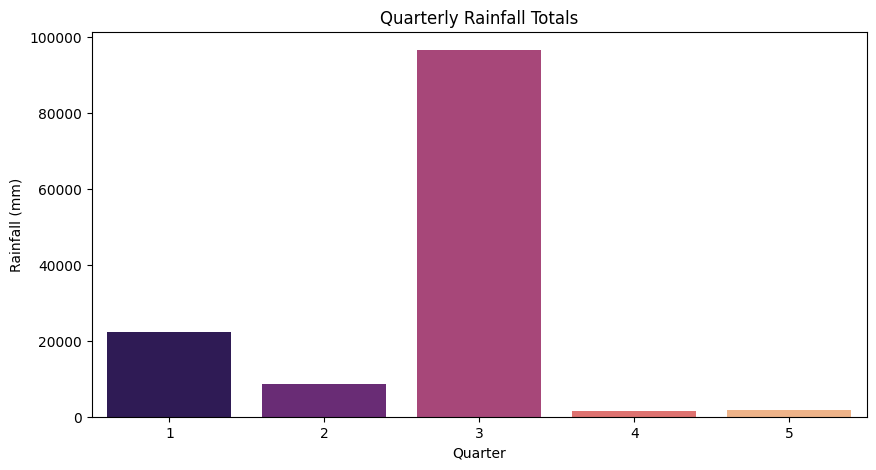

In [26]:
# Quarterly Analysis
quarterly_totals = daily_totals.groupby((np.arange(len(daily_totals)) // 90)).sum()
plt.figure(figsize=(10, 5))
sns.barplot(x=quarterly_totals.index + 1, y=quarterly_totals.values, palette="magma")
plt.title("Quarterly Rainfall Totals")
plt.xlabel("Quarter")
plt.ylabel("Rainfall (mm)")
plt.show()

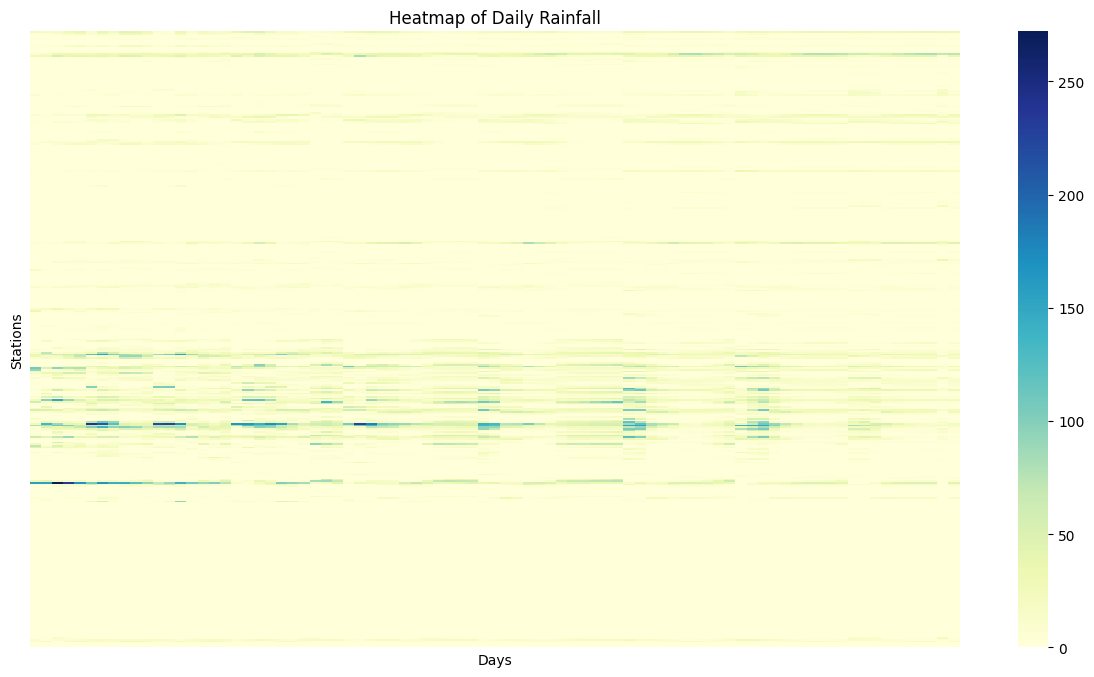

In [27]:
# Heatmap Visualization (Daily Rainfall Across the Year)
daily_matrix = data[rainfall_cols].T
plt.figure(figsize=(15, 8))
sns.heatmap(daily_matrix, cmap="YlGnBu", cbar=True, xticklabels=False, yticklabels=False)
plt.title("Heatmap of Daily Rainfall")
plt.xlabel("Days")
plt.ylabel("Stations")
plt.show()

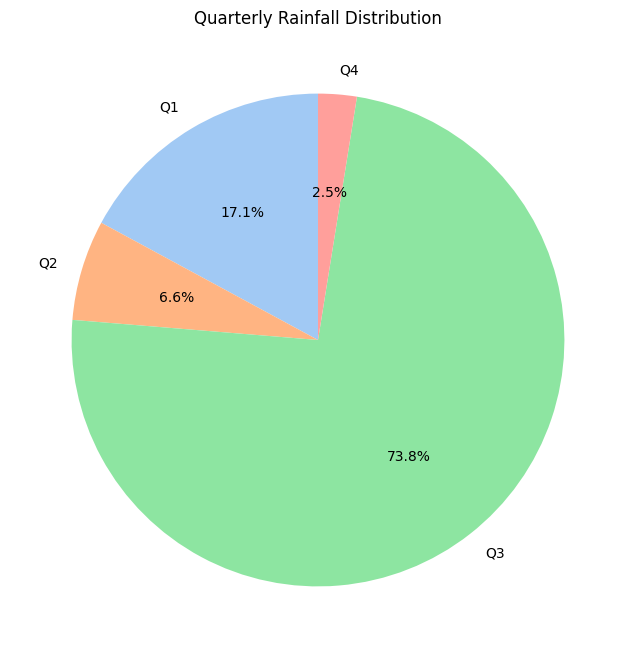

In [31]:
# Calculate Quarterly Totals
# Group data into quarters (365 days divided into approximately 4 quarters)
quarterly_totals = daily_totals.groupby((np.arange(len(daily_totals)) // 91)).sum()

# Ensure exactly 4 quarters by summing remaining days in the last quarter
if len(quarterly_totals) > 4:
    quarterly_totals.iloc[3] += quarterly_totals.iloc[4]
    quarterly_totals = quarterly_totals[:4]

# Plot Pie Chart
quarter_labels = ["Q1", "Q2", "Q3", "Q4"]
plt.figure(figsize=(8, 8))
plt.pie(quarterly_totals, labels=quarter_labels, autopct="%1.1f%%", startangle=90, colors=sns.color_palette("pastel"))
plt.title("Quarterly Rainfall Distribution")
plt.show()


In [32]:

# Check if the data has the correct number of days (365 or similar)
num_days = len(rainfall_cols)
print(f"Total days: {num_days}")

# Reshape for Weekly, Monthly, Quarterly data
# Handle any leftover days by adjusting the reshaping size

# Weekly Analysis: Ensure it's divisible by 7
weekly_chunks = num_days // 7  # Number of full weeks
remaining_days = num_days % 7   # Remaining days that don't fit into a full week

# Reshaping with padding for weekly analysis
if remaining_days > 0:
    rainfall_data_weekly = np.pad(data[rainfall_cols].values, ((0, 0), (0, 7 - remaining_days)))
else:
    rainfall_data_weekly = data[rainfall_cols].values

Weekly_Total = np.sum(rainfall_data_weekly.reshape(-1, 7, 83), axis=1)

# Monthly Analysis: Ensure it's divisible by 30
monthly_chunks = num_days // 30  # Number of full months
remaining_days = num_days % 30   # Remaining days that don't fit into a full month

# Reshaping with padding for monthly analysis
if remaining_days > 0:
    rainfall_data_monthly = np.pad(data[rainfall_cols].values, ((0, 0), (0, 30 - remaining_days)))
else:
    rainfall_data_monthly = data[rainfall_cols].values

Monthly_Total = np.sum(rainfall_data_monthly.reshape(-1, 30, 83), axis=1)

# Quarterly Analysis: Ensure it's divisible by 90
quarterly_chunks = num_days // 90  # Number of full quarters
remaining_days = num_days % 90     # Remaining days that don't fit into a full quarter

# Reshaping with padding for quarterly analysis
if remaining_days > 0:
    rainfall_data_quarterly = np.pad(data[rainfall_cols].values, ((0, 0), (0, 90 - remaining_days)))
else:
    rainfall_data_quarterly = data[rainfall_cols].values

Quarterly_Total = np.sum(rainfall_data_quarterly.reshape(-1, 90, 83), axis=1)

# Output the results
print(f"Weekly Totals: \n{Weekly_Total}\n")
print(f"Monthly Totals: \n{Monthly_Total}\n")
print(f"Quarterly Totals: \n{Quarterly_Total}\n")


Total days: 365
Weekly Totals: 
[[38  2  0 ... 50 18 36]
 [ 3  4 20 ...  0  0  1]
 [13 26  7 ... 29 18  6]
 ...
 [14  4  2 ... 21 38  8]
 [28 14  2 ...  1 29  4]
 [ 8 13 22 ... 13 18  1]]

Monthly Totals: 
[[189 199 310 ... 130  49 225]
 [125 212 191 ...  45 238 473]
 [184  89  70 ... 114 193  92]
 ...
 [106 139 213 ... 155 179  92]
 [101 132 119 ...  95  26  43]
 [103 156 117 ...  82  56  77]]

Quarterly Totals: 
[[353 423 257 229 285 558 323 279 288 343 504 248 262 397 493 312 279 323
  516 418 370 257 321 502 379 280 462 555 317 320 252 338 299 325 361 340
  494 317 232 319 527 292 256 187 320 383 235 203 320 517 253 271 342 683
  433 305 244 336 640 397 266 401 509 360 359 345 409 426 292 376 329 545
  336 280 386 635 295 308 255 362 388 218 206]
 [327 307 505 382 266 334 434 343 264 277 298 172 160 392 356 249 362 269
  250 410 361 317 188 342 333 231 285 375 387 207 290 238 489 425 271 286
  287 451 391 262 486 374 389 244 267 311 206 253 413 316 447 340 256 330
  437 348 289 182

In [30]:
data[rainfall_cols]

,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10,...,Day_356,Day_357,Day_358,Day_359,Day_360,Day_361,Day_362,Day_363,Day_364,Day_365
0,24,2,0,0,2,0,0,0,2,0,...,0,0,0,0,0,11,9,0,0,0
1,18,3,0,0,2,0,0,0,2,0,...,0,0,0,0,1,2,18,0,0,0
2,20,8,0,0,0,0,0,0,6,0,...,0,0,0,0,13,8,0,0,0,0
3,28,15,0,0,3,0,0,0,12,0,...,0,0,0,0,4,8,16,0,0,0
4,37,22,0,0,2,0,0,0,17,0,...,0,0,0,0,2,12,23,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,35,1,0,0,5,0,0,2,7,1,...,0,0,0,0,0,6,14,0,0,0
79,36,1,0,0,5,0,0,2,7,1,...,0,0,0,0,0,5,15,0,0,0
80,37,1,0,0,5,0,0,2,7,1,...,0,0,0,0,0,5,15,0,0,0
81,30,4,0,1,1,0,0,0,6,0,...,0,0,0,0,21,4,1,0,0,0


In [34]:

# Drop unnecessary columns
if 'Unnamed: 377' in data.columns:
    data = data.drop(columns=['Unnamed: 377'])


# Extract rainfall columns
rainfall_cols = [col for col in data.columns if col.startswith('Day_')]

# Ensure data types are numeric for rainfall columns
data[rainfall_cols] = data[rainfall_cols].apply(pd.to_numeric, errors='coerce')

# Fill NaN values with 0 (if necessary)
data[rainfall_cols] = data[rainfall_cols].fillna(0)


In [35]:

# DAILY ANALYSIS
daily_totals = data[['FID'] + rainfall_cols].groupby('FID').sum()

# WEEKLY ANALYSIS
weekly_totals = daily_totals[rainfall_cols].apply(
    lambda x: np.sum(x.values.reshape(-1, 7), axis=1) if len(x) % 7 == 0 
    else np.sum(np.pad(x.values, (0, 7 - len(x) % 7)).reshape(-1, 7), axis=1), axis=1)

# MONTHLY ANALYSIS
monthly_totals = daily_totals[rainfall_cols].apply(
    lambda x: np.sum(x.values.reshape(-1, 30), axis=1) if len(x) % 30 == 0 
    else np.sum(np.pad(x.values, (0, 30 - len(x) % 30)).reshape(-1, 30), axis=1), axis=1)

# QUARTERLY ANALYSIS
quarterly_totals = daily_totals[rainfall_cols].apply(
    lambda x: np.sum(x.values.reshape(-1, 90), axis=1) if len(x) % 90 == 0 
    else np.sum(np.pad(x.values, (0, 90 - len(x) % 90)).reshape(-1, 90), axis=1), axis=1)


In [36]:

# Visualization Functions
def plot_totals(data, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=data.index, y=data.values)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()





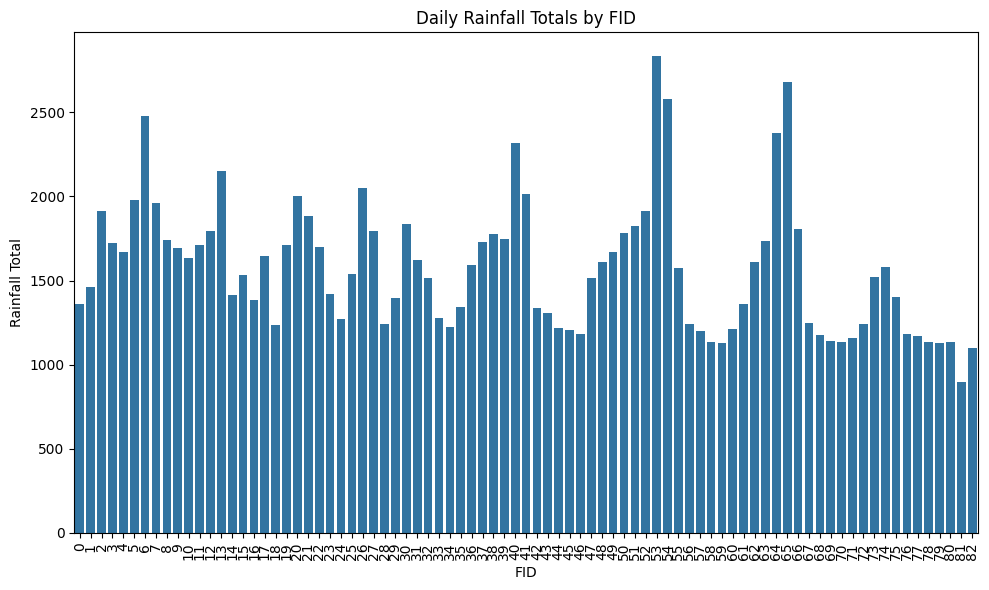

In [37]:
# Plot Daily Totals
plot_totals(daily_totals.sum(axis=1), "Daily Rainfall Totals by FID", "FID", "Rainfall Total")



/tmp/ipykernel_5872/1563884481.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x="Week", y="Rainfall", hue="FID", ci=None)


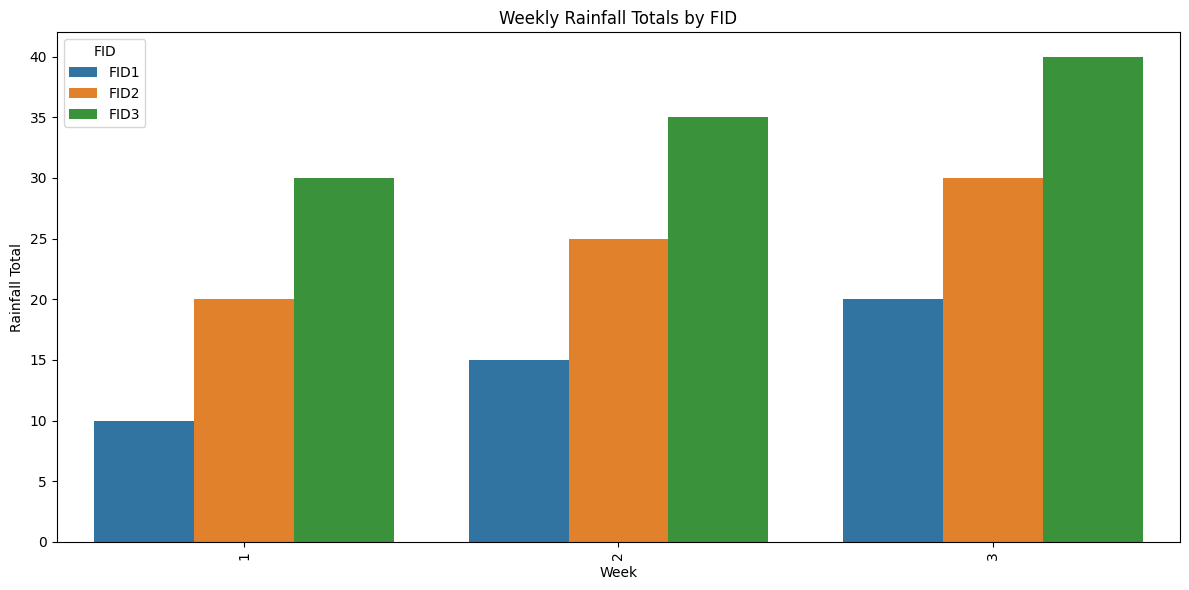

In [43]:
# Ensure weekly_totals is a properly structured DataFrame
# Example: Creating a sample weekly_totals DataFrame for testing
weekly_totals = pd.DataFrame({
    "Week1": [10, 20, 30],
    "Week2": [15, 25, 35],
    "Week3": [20, 30, 40]
}, index=["FID1", "FID2", "FID3"])

# Prepare weekly_totals_df with meaningful indices
weekly_totals_df = pd.DataFrame({
    "FID": np.repeat(weekly_totals.index, weekly_totals.shape[1]),
    "Week": np.tile(range(1, weekly_totals.shape[1] + 1), weekly_totals.shape[0]),
    "Rainfall": weekly_totals.values.flatten()
})

# Visualization Function
def plot_totals(data, title, xlabel, ylabel):
    plt.figure(figsize=(12, 6))
    sns.barplot(data=data, x="Week", y="Rainfall", hue="FID", ci=None)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Call the plot function
plot_totals(weekly_totals_df, "Weekly Rainfall Totals by FID", "Week", "Rainfall Total")


In [44]:
# Flatten the monthly_totals DataFrame into a long format
monthly_totals_df = pd.DataFrame({
    "FID": np.repeat(monthly_totals.index, monthly_totals.shape[1]),
    "Month": np.tile(range(1, monthly_totals.shape[1] + 1), monthly_totals.shape[0]),
    "Rainfall": monthly_totals.values.flatten()
})

# Updated Visualization Function
def plot_totals(data, title, xlabel, ylabel):
    plt.figure(figsize=(12, 6))
    sns.barplot(data=data, x="Month", y="Rainfall", hue="FID", ci=None)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Plot Monthly Totals
plot_totals(monthly_totals_df, "Monthly Rainfall Totals by FID", "Month", "Rainfall Total")


IndexError: tuple index out of range

In [40]:
# Plot Quarterly Totals
plot_totals(pd.Series(quarterly_totals.values.flatten()), "Quarterly Rainfall Totals by FID", "Quarter", "Rainfall Total")



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<Figure size 1000x600 with 0 Axes>

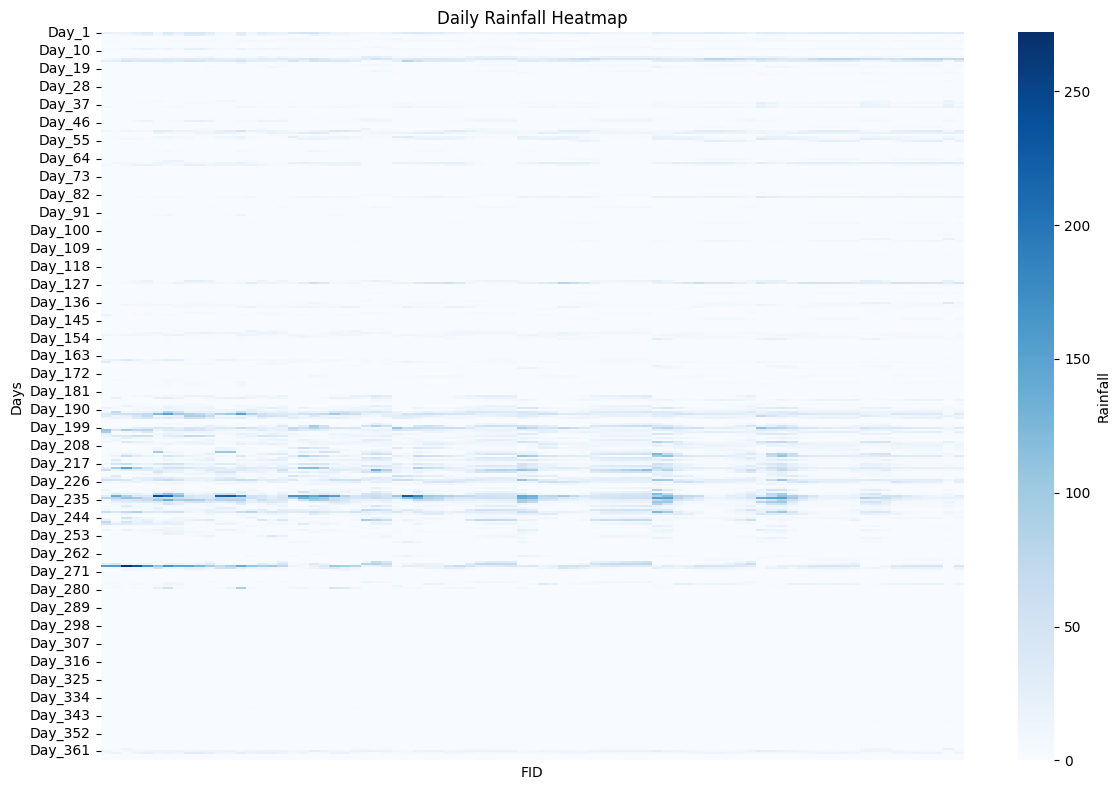

In [41]:
# Heatmap Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(daily_totals[rainfall_cols].T, cmap="Blues", cbar_kws={'label': 'Rainfall'}, xticklabels=False)
plt.title("Daily Rainfall Heatmap")
plt.ylabel("Days")
plt.xlabel("FID")
plt.tight_layout()
plt.show()

In [49]:
data.head(5)
# data.index

,FID,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,...,Day_357,Day_358,Day_359,Day_360,Day_361,Day_362,Day_363,Day_364,Day_365,Total_Activity
0,0,24,2,0,0,2,0,0,0,2,...,0,0,0,0,11,9,0,0,0,1362.0
1,1,18,3,0,0,2,0,0,0,2,...,0,0,0,1,2,18,0,0,0,1461.0
2,2,20,8,0,0,0,0,0,0,6,...,0,0,0,13,8,0,0,0,0,1915.0
3,3,28,15,0,0,3,0,0,0,12,...,0,0,0,4,8,16,0,0,0,1723.0
4,4,37,22,0,0,2,0,0,0,17,...,0,0,0,2,12,23,0,0,0,1672.0
